In [23]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob


In [28]:
data = None
for f in glob.glob("release/ncomp*.csv"):
    fdata = pd.read_csv(f)
    data = fdata if data is None else data.append(fdata)


lin          algo  logn  maxc  avgc
n                              
2        2048  2048  2048  2048
4        2048  2048  2048  2048
8        2048  2048  2048  2048
16       2048  2048  2048  2048
32       2048  2048  2048  2048
64       2048  2048  2048  2048
128      2048  2048  2048  2048
256      2048  2048  2048  2048
512      2048  2048  2048  2048
1024     2048  2048  2048  2048
2048     2048  2048  2048  2048
4096     2048  2048  2048  2048
8192     1024  1024  1024  1024
16384     512   512   512   512
32768     256   256   256   256
65536     128   128   128   128
131072     64    64    64    64
262144     32    32    32    32
524288     32    32    32    32
1048576    32    32    32    32
2097152    32    32    32    32
4194304    32    32    32    32
exp          algo  logn  maxc  avgc
n                              
2        2048  2048  2048  2048
4        2048  2048  2048  2048
8        2048  2048  2048  2048
16       2048  2048  2048  2048
32       2048  2048  2048  2048


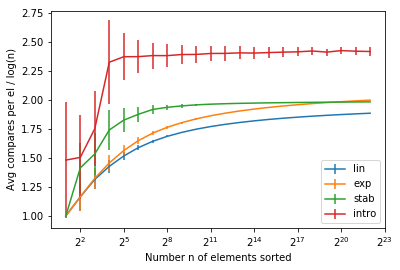

lin          algo  logn  maxc  avgc
n                              
2        2048  2048  2048  2048
4        2048  2048  2048  2048
8        2048  2048  2048  2048
16       2048  2048  2048  2048
32       2048  2048  2048  2048
64       2048  2048  2048  2048
128      2048  2048  2048  2048
256      2048  2048  2048  2048
512      2048  2048  2048  2048
1024     2048  2048  2048  2048
2048     2048  2048  2048  2048
4096     2048  2048  2048  2048
8192     1024  1024  1024  1024
16384     512   512   512   512
32768     256   256   256   256
65536     128   128   128   128
131072     64    64    64    64
262144     32    32    32    32
524288     32    32    32    32
1048576    32    32    32    32
2097152    32    32    32    32
4194304    32    32    32    32
exp          algo  logn  maxc  avgc
n                              
2        2048  2048  2048  2048
4        2048  2048  2048  2048
8        2048  2048  2048  2048
16       2048  2048  2048  2048
32       2048  2048  2048  2048


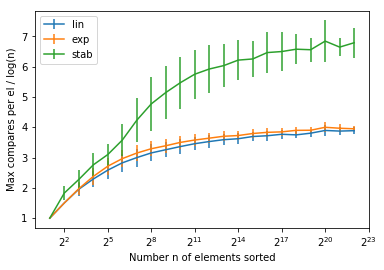

In [33]:
plt.cla()
plt.clf()


for ycol in ["Avg", "Max"]:
    plt.semilogx(basex=2)
    plt.xlabel("Number n of elements sorted")
    
    for alg in data.algo.unique():
        plt.ylabel(ycol + " compares per el / log(n)")
        view = data[data.algo == alg]
        grp = view.groupby("n")
        print(alg, grp.count())
        
        col = grp[ycol.lower()+"c"]
        
        val = col.mean() / grp.logn.mean()**1
        var = col.std() / grp.logn.mean()**1
        
        if np.max(grp[ycol.lower()+"c"].mean()) > 1e5:
            continue
        
        plt.errorbar(val.index, val, var, label=alg)

    plt.legend()
    plt.show()    

In [35]:
np.prod(range(1, 16))

1307674368000